### Read the data of vaccination centres

In [1]:
import geopandas as gpd

In [2]:
centres = gpd.read_file('/Users/xrb/Desktop/UCL/Dissertation/STEP1/vaccination_site.gpkg')
centres = centres.to_crs('epsg:27700')

In [3]:
centres.head(5)

index  supply_value                       geometry
0      0             1  POINT (527671.845 409625.582)
1      1             1  POINT (532582.907 182659.957)
2      2             1  POINT (433880.091 387238.877)
3      3             1  POINT (546372.813 254986.453)
4      4             1  POINT (338131.255 397000.897)

### Read the data of MSOA boundary

In [4]:
MSOA = gpd.read_file('/Users/xrb/Desktop/UCL/Dissertation/STEP1/MSOA_boundary.gpkg')
MSOA = MSOA.to_crs('epsg:27700')

In [5]:
MSOA.head(5)

OBJECTID   MSOA11CD                  MSOA11NM                 MSOA11NMW  \
0         1  E02000001        City of London 001        City of London 001   
1         2  E02000002  Barking and Dagenham 001  Barking and Dagenham 001   
2         3  E02000003  Barking and Dagenham 002  Barking and Dagenham 002   
3         4  E02000004  Barking and Dagenham 003  Barking and Dagenham 003   
4         5  E02000005  Barking and Dagenham 004  Barking and Dagenham 004   

    BNG_E   BNG_N      LONG       LAT   Shape__Area  Shape__Length  \
0  532378  181354 -0.093570  51.51560  3.226298e+06    7736.354286   
1  548267  189693  0.138759  51.58659  2.064081e+06    7071.368067   
2  548259  188522  0.138150  51.57607  2.226199e+06    7772.530669   
3  551004  186418  0.176830  51.55644  2.599306e+06    6982.412334   
4  548733  186827  0.144269  51.56071  1.221861e+06    5599.765567   

                                            geometry  
0  POLYGON ((532947.881 181895.061, 533412.520 18...  
1  POLYGON ((549002.599 190873.761, 549122.828 18...  
2  POLYGON ((548956.371 189063.484, 549087.474 18...  
3  POLYGON ((551945.701 186027.855, 551672.764 18...  
4  POLYGON ((549420.553 187442.648, 548985.314 18...

### Read the data of MSOA of East of England

In [6]:
import pandas as pd

In [7]:
eastMSOA = pd.read_csv('/Users/xrb/Desktop/UCL/Dissertation/STEP1/MSOA_East of England.csv')

In [8]:
eastMSOA.head(5)

Region name  MSOA code                      MSOA name
0  East of England  E02003238                     Werrington
1  East of England  E02003239           Newborough & Peakirk
2  East of England  E02003240  Barnack, Wittering & Wansford
3  East of England  E02003241                  Eye & Thorney
4  East of England  E02003242                         Walton

### Keep the spatial data of MSOA of East of England only

In [9]:
eastMSOAspatial = pd.merge(MSOA, eastMSOA, how='inner', left_on='MSOA11CD',right_on='MSOA code')
eastMSOAspatial.head(5)

OBJECTID   MSOA11CD          MSOA11NM         MSOA11NMW   BNG_E   BNG_N  \
0      3151  E02003238  Peterborough 002  Peterborough 002  516868  304356   
1      3152  E02003239  Peterborough 003  Peterborough 003  520689  305883   
2      3153  E02003240  Peterborough 004  Peterborough 004  508021  303301   
3      3154  E02003241  Peterborough 005  Peterborough 005  527609  304403   
4      3155  E02003242  Peterborough 006  Peterborough 006  517002  302833   

      LONG       LAT   Shape__Area  Shape__Length  \
0 -0.27491  52.62441  2.019142e+06    6157.819583   
1 -0.21794  52.63730  4.124893e+07   31645.438067   
2 -0.40590  52.61676  6.884148e+07   44178.663133   
3 -0.11631  52.62242  9.549405e+07   45122.954480   
4 -0.27347  52.61070  3.275329e+06    9975.709892   

                                            geometry      Region name  \
0  POLYGON ((517544.653 303597.911, 517272.626 30...  East of England   
1  POLYGON ((525851.183 307596.658, 525441.863 30...  East of England   
2  POLYGON ((511058.883 308185.919, 510061.284 30...  East of England   
3  POLYGON ((533247.194 308908.961, 534704.394 30...  East of England   
4  POLYGON ((516654.872 303795.368, 516807.710 30...  East of England   

   MSOA code                      MSOA name  
0  E02003238                     Werrington  
1  E02003239           Newborough & Peakirk  
2  E02003240  Barnack, Wittering & Wansford  
3  E02003241                  Eye & Thorney  
4  E02003242                         Walton

In [10]:
eastMSOAspatial.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 735 entries, 0 to 734
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       735 non-null    int64   
 1   MSOA11CD       735 non-null    object  
 2   MSOA11NM       735 non-null    object  
 3   MSOA11NMW      735 non-null    object  
 4   BNG_E          735 non-null    int64   
 5   BNG_N          735 non-null    int64   
 6   LONG           735 non-null    float64 
 7   LAT            735 non-null    float64 
 8   Shape__Area    735 non-null    float64 
 9   Shape__Length  735 non-null    float64 
 10  geometry       735 non-null    geometry
 11  Region name    735 non-null    object  
 12  MSOA code      735 non-null    object  
 13  MSOA name      735 non-null    object  
dtypes: float64(4), geometry(1), int64(3), object(6)
memory usage: 86.1+ KB


In [11]:
#keep the columns we need
eastMSOAspatial = eastMSOAspatial[['MSOA11CD','geometry','MSOA name']]

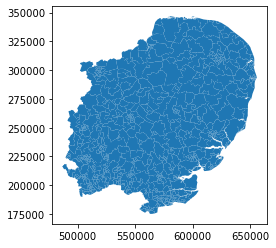

In [12]:
eastMSOAspatial.plot()

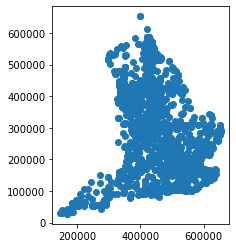

In [13]:
centres.plot()

### Keep the vaccination centres data of East of England only

In [14]:
centresEast = gpd.overlay(centres, eastMSOAspatial, how='intersection')

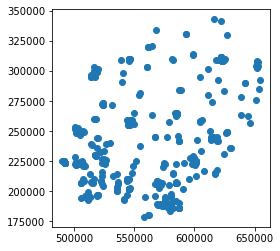

In [15]:
centresEast.plot()

In [16]:
centresEast.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   index         367 non-null    int64   
 1   supply_value  367 non-null    int64   
 2   MSOA11CD      367 non-null    object  
 3   MSOA name     367 non-null    object  
 4   geometry      367 non-null    geometry
dtypes: geometry(1), int64(2), object(2)
memory usage: 14.5+ KB


In [17]:
centresEast.head(5)

index  supply_value   MSOA11CD                      MSOA name  \
0      3             1  E02003731  Addenbrooke's & Queen Edith's   
1    153             1  E02003731  Addenbrooke's & Queen Edith's   
2     12             1  E02003293               Southend Central   
3     21             1  E02003293               Southend Central   
4    169             1  E02003293               Southend Central   

                        geometry  
0  POINT (546372.813 254986.453)  
1  POINT (546152.712 254956.347)  
2  POINT (587016.746 185867.604)  
3  POINT (587016.746 185867.604)  
4  POINT (587016.746 185867.604)

In [18]:
centresEast = centresEast[['index','geometry']]

In [19]:
centresEast = centresEast.rename(columns={'index':'number'})

### read MSOA population weighted centroids data

set population weighted centroids as demand point

source:
https://geoportal.statistics.gov.uk/datasets/ons::middle-layer-super-output-areas-december-2011-population-weighted-centroids/about

In [20]:
weighted_centroids_MSOA = gpd.read_file('/Users/xrb/Desktop/UCL/Dissertation/STEP1/MSOA_Population_Weighted_Centroids_with_population.gpkg')

In [21]:
weighted_centroids_MSOA.head(5)

objectid   msoa11cd  pop0-49  pop50-59  pop60-69  pop70-79  pop80-89  \
0         1  E02002536     5688      1416      1132       891       540   
1         2  E02002537     5578      1251       836       545       386   
2         3  E02002534     2547       824       863       967       407   
3         4  E02002535     4959      1636      1385       870       416   
4         5  E02002532     3783       970       810       655       342   

   pop90+  total_pop                       geometry  
0     104       9771  POINT (445582.345 524175.434)  
1      45       8641  POINT (446777.151 524256.841)  
2      85       5693  POINT (461356.929 515118.900)  
3      70       9336  POINT (446117.027 525455.836)  
4      95       6655  POINT (461053.212 516175.379)

### Keep the centroids data of MSOA of East of England only

In [22]:
eastMSOAcentroids = pd.merge(weighted_centroids_MSOA, eastMSOA, how='inner', left_on='msoa11cd',right_on='MSOA code')
eastMSOAcentroids.head(5)

objectid   msoa11cd  pop0-49  pop50-59  pop60-69  pop70-79  pop80-89  \
0       897  E02004446     3509      1243      1010       747       301   
1       898  E02004447     2665      1122       978       802       295   
2       899  E02004444     5664      1423      1026       750       297   
3       900  E02004445     5727      1090       825       646       281   
4       901  E02004442     6207      1057       756       475       205   

   pop90+  total_pop                       geometry      Region name  \
0      57       6867  POINT (572600.918 240100.294)  East of England   
1      53       5915  POINT (583884.046 237502.431)  East of England   
2      64       9224  POINT (567348.301 187863.989)  East of England   
3      52       8621  POINT (572787.602 187770.248)  East of England   
4      37       8737  POINT (572185.177 188038.221)  East of England   

   MSOA code                            MSOA name  
0  E02004446    Steeple Bumpstead & Great Yeldham  
1  E02004447  Bures Hamlet, Maplestead & Belchamp  
2  E02004444                        Langdon Hills  
3  E02004445                       Vange & Pitsea  
4  E02004442                            Barstable

In [23]:
eastMSOAcentroids = eastMSOAcentroids[['msoa11cd','geometry','total_pop','MSOA name']]

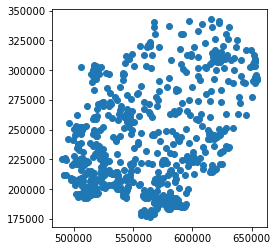

In [24]:
eastMSOAcentroids.plot()

### Calculate the Euclidean distance between each facility and centroid

In [25]:
from geopy import distance

In [26]:
dfm = pd.merge(eastMSOAcentroids, centresEast, how = 'cross',suffixes = ['','_2'])
dfm.head(5)

msoa11cd                       geometry  total_pop  \
0  E02004446  POINT (572600.918 240100.294)       6867   
1  E02004446  POINT (572600.918 240100.294)       6867   
2  E02004446  POINT (572600.918 240100.294)       6867   
3  E02004446  POINT (572600.918 240100.294)       6867   
4  E02004446  POINT (572600.918 240100.294)       6867   

                           MSOA name  number                     geometry_2  
0  Steeple Bumpstead & Great Yeldham       3  POINT (546372.813 254986.453)  
1  Steeple Bumpstead & Great Yeldham     153  POINT (546152.712 254956.347)  
2  Steeple Bumpstead & Great Yeldham      12  POINT (587016.746 185867.604)  
3  Steeple Bumpstead & Great Yeldham      21  POINT (587016.746 185867.604)  
4  Steeple Bumpstead & Great Yeldham     169  POINT (587016.746 185867.604)

In [27]:
# geometry_2 is the location of vaccination centres

In [28]:
dfm['distance'] = dfm['geometry'].distance(dfm['geometry_2'],align=True)

In [29]:
dfm.head(5)

msoa11cd                       geometry  total_pop  \
0  E02004446  POINT (572600.918 240100.294)       6867   
1  E02004446  POINT (572600.918 240100.294)       6867   
2  E02004446  POINT (572600.918 240100.294)       6867   
3  E02004446  POINT (572600.918 240100.294)       6867   
4  E02004446  POINT (572600.918 240100.294)       6867   

                           MSOA name  number                     geometry_2  \
0  Steeple Bumpstead & Great Yeldham       3  POINT (546372.813 254986.453)   
1  Steeple Bumpstead & Great Yeldham     153  POINT (546152.712 254956.347)   
2  Steeple Bumpstead & Great Yeldham      12  POINT (587016.746 185867.604)   
3  Steeple Bumpstead & Great Yeldham      21  POINT (587016.746 185867.604)   
4  Steeple Bumpstead & Great Yeldham     169  POINT (587016.746 185867.604)   

       distance  
0  30158.104290  
1  30334.961731  
2  56115.958149  
3  56115.958149  
4  56115.958149

## Location Set Covering Problem (LSCP)

In [30]:
from spopt.locate.coverage import LSCP
from spopt.locate.util import simulated_geo_points

import numpy
import pulp
import spaghetti
from shapely.geometry import Point
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.8/site-packages/spaghetti/network.py:36: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(f"{dep_msg}", FutureWarning)


In [31]:
#get a cost_matrix
dfm_piv = dfm.pivot_table(values="distance", index="msoa11cd", columns="number")
dfm_piv

number             3              12             14             21    \
msoa11cd                                                               
E02003238  57581.467860  137763.894911   56826.199845  137763.894911   
E02003239  55847.488156  136029.492178   56171.481663  136029.492178   
E02003240  62362.146836  142023.299599   53612.700048  142023.299599   
E02003241  53194.167747  133283.059598   56893.243833  133283.059598   
E02003242  55803.442379  135982.540782   55191.237436  135982.540782   
...                 ...            ...            ...            ...   
E02006878  49175.360547  129183.640736   47203.834484  129183.640736   
E02006907  94038.059798  127863.911026  133148.894706  127863.911026   
E02006908  94791.887542  128579.359618  133866.942369  128579.359618   
E02006922  62299.777404   42966.687303   99608.261728   42966.687303   
E02006926  76823.650343   27343.724046   89081.849168   27343.724046   

number              29             37            57             68    \
msoa11cd                                                               
E02003238  126037.109279  112937.977717  58252.738681  105463.717386   
E02003239  124347.311358  111029.256927  56468.556589  103922.215160   
E02003240  129841.258033  119900.207435  63593.288184  116424.596823   
E02003241  121793.053347  107350.016267  53579.650346   99456.308977   
E02003242  124233.564538  111372.809744  56509.600566  105122.209270   
...                  ...            ...           ...            ...   
E02006878  117222.079227  106242.015158  50210.699346  106407.958384   
E02006907  124980.475737   84450.726606  90544.681886    3781.696597   
E02006908  125724.197336   85166.447591  91300.250252    3564.795261   
E02006922   42209.658907    2466.376567  60021.212011   87807.665944   
E02006926   20391.634975   61875.201841  77603.045920  145865.404627   

number              71             76    ...           2750           2751  \
msoa11cd                                 ...                                 
E02003238   10041.996726  115808.718910  ...  127503.596688  104138.418386   
E02003239    9656.513498  113901.584304  ...  125867.908052  102568.919993   
E02003240   11178.623725  122724.758855  ...  130746.636547  115071.235030   
E02003241   11997.104404  110234.344681  ...  123526.107120   98080.231175   
E02003242    8513.154378  114238.842179  ...  125680.299533  103753.306884   
...                  ...            ...  ...            ...            ...   
E02006878    3006.798283  109071.224835  ...  118441.808022  104850.524933   
E02006907  110591.864643   86233.460648  ...  131156.279123    3033.789425   
E02006908  111167.613816   86940.507758  ...  131905.861853    3448.601985   
E02006922  111202.972894    1240.960108  ...   49048.775305   85008.847677   
E02006926  124288.544672   61211.743904  ...   13397.095080  143012.651808   

number              2752           2753           2754          2755  \
msoa11cd                                                               
E02003238   44201.849260   82941.476540  100223.118290  54205.116834   
E02003239   43165.749520   81464.553770   98295.839964  52448.426230   
E02003240   43727.327183   93943.336898  109221.309086  59288.008058   
E02003241   42958.910808   77062.733794   93998.840993  49701.656097   
E02003242   42415.385947   82697.809270   98992.114507  52441.942677   
...                  ...            ...            ...           ...   
E02006878   34244.897349   84510.535958   95915.573333  45978.086726   
E02006907  117057.506567   25353.659802   52532.938225  92417.030685   
E02006908  117763.173540   25712.857603   53263.958245  93163.202999   
E02006922   91116.464917   88112.311842   32900.755125  64491.453705   
E02006926   91651.311718  140340.126450   91603.893451  80516.713388   

number              2756           2757           2758           2759  
msoa11cd                                                               
E02003238  132274.105325   474

#### The current situation: there are 735 MSOA and 367 vaccination centres in East of England.

In [32]:
cost_matrix = dfm_piv.to_numpy()
cost_matrix

array([[ 57581.46785991, 137763.89491097,  56826.19984473, ...,
         47478.88068177,  44281.1059524 ,   6175.02174981],
       [ 55847.48815576, 136029.49217802,  56171.48166344, ...,
         46324.15421088,  42643.33306978,   4708.81806882],
       [ 62362.14683581, 142023.29959918,  53612.7000482 , ...,
         58373.19169446,  55123.69520227,  13738.95736199],
       ...,
       [ 94791.88754221, 128579.3596176 , 133866.94236853, ...,
         63716.68168981,  63457.4762208 , 105620.87864375],
       [ 62299.77740388,  42966.68730299,  99608.26172755, ...,
        102128.82020232,  87085.48076288, 109761.99136312],
       [ 76823.65034284,  27343.72404624,  89081.84916754, ...,
        140764.01217338, 123879.60782264, 126180.4016983 ]])

In [33]:
#sort our facility points
centresEast.head(5)

number                       geometry
0       3  POINT (546372.813 254986.453)
1     153  POINT (546152.712 254956.347)
2      12  POINT (587016.746 185867.604)
3      21  POINT (587016.746 185867.604)
4     169  POINT (587016.746 185867.604)

In [34]:
centresEast = centresEast.sort_values(by=['number'])

In [35]:
centresEast.head(5)

number                       geometry
0       3  POINT (546372.813 254986.453)
2      12  POINT (587016.746 185867.604)
6      14  POINT (504658.986 248920.675)
3      21  POINT (587016.746 185867.604)
7      29  POINT (575706.417 192972.819)

In [36]:
#Here the rest of parameters are set. The ai is the demand weight and in this case we model as population of each MSOA.
ai = eastMSOAcentroids['total_pop'].to_numpy()

#each demand point is covered by at least one vaccination centre within 10 miles (16093 meters)
service_dist = 16093

p_facility = 4

In [37]:
from spopt.locate.coverage import LSCP

In [38]:
lscp = LSCP.from_cost_matrix(cost_matrix, service_dist)

lscp = lscp.solve(pulp.GLPK(msg=False))

lscp.facility_client_array()

In [39]:
pip install matplotlib_scalebar

Note: you may need to restart the kernel to use updated packages.


In [46]:
len(dv_colors)

15

In [123]:
#plot the results of the model
from matplotlib.patches import Patch
import matplotlib.lines as mlines
from matplotlib_scalebar.scalebar import ScaleBar
import geopandas

dv_colors = [
    "saddlebrown",
    "darkgoldenrod",
    "mediumseagreen",
    "lightskyblue",
    "lavender",
    "darkslategray",
    "coral",
    "mediumvioletred",
    "darkcyan",
    "cyan",
    "limegreen",
    "peachpuff",
    "blueviolet",
    "fuchsia",
    "thistle",
    "lawngreen",
    "lightpink",
    "lightseagreen",
    "aqua",
    "lightsteelblue",
    "linen",
    "mediumorchid",
    "mediumpurple",
    "mediumspringgreen",
    "midnightblue",
    "moccasin",
    "navy",
    "olivedrab",
    "orchid",
    "#FFFF00",
    "wheat",
    "violet",
    "#00C78C",
    "turquoise",
    "#FF6347",
    "thistle",
    "tan",
    "steelblue"
]

def plot_results(model, facility_points_gdf, demand_points_gdf, facility_count, title, p):

    arr_points = []
    fac_sites = []

    for i in range(facility_count):
        if model.fac2cli[i]:
            geom = demand_points_gdf.iloc[model.fac2cli[i]]["geometry"]
            arr_points.append(geom)
            fac_sites.append(i)
    
    model.uncovered_clients()
    xcov = model.n_cli_uncov
    
    fig, ax = plt.subplots(figsize=(10, 15))
    legend_elements = []

    eastMSOAspatial.plot(ax=ax, alpha=.5, fc="tan", ec="k", zorder=1)
    _patch = Patch(alpha=.5, fc="tan", ec="k", label="Dissolved Service Areas")
    legend_elements.append(_patch)

    demand_points_gdf.plot(
        ax=ax, fc="k", ec="k", marker="s", markersize=7, zorder=2
    )
    legend_elements.append(
        mlines.Line2D(
            [],
            [],
            marker="s",
            markerfacecolor="k",
            markeredgecolor="k",
            ms=3,
            linewidth=0,
            label=f"Demand sites not covered ($n$={xcov})"
        )
    )

    facility_points_gdf.plot(
        ax=ax, fc="brown", marker="*", markersize=80, zorder=8
    )
    legend_elements.append(
        mlines.Line2D(
            [],
            [],
            marker="*",
            markerfacecolor="brown",
            markeredgecolor="brown",
            ms=7,
            lw=0,
            label=f"Store sites ($n$={facility_count})"
        )
    )

    _zo, _ms = 4, 4
    for i in range(len(arr_points)):

        cset = dv_colors[i]
        fac = fac_sites[i]
        fname = facility_points_gdf.iloc[[fac]]["number"]
        ##fname = f"{fname.squeeze().replace('_', ' ')}"

        gdf = geopandas.GeoDataFrame(arr_points[i])

        label = f"Demand sites covered by {fname}"
        gdf.plot(ax=ax, zorder=_zo, ec="k", fc=cset, markersize=100*_ms)
        legend_elements.append(
            mlines.Line2D(
                [],
                [],
                marker="o",
                markerfacecolor=cset,
                markeredgecolor="k",
                ms= _ms + 7,
                lw=0,
                label=label
            )
        )

        facility_points_gdf.iloc[[fac]].plot(
            ax=ax, marker="*", markersize=1000, zorder=9, fc=cset, ec="k", lw=2
        )
        legend_elements.append(
            mlines.Line2D(
                [],
                [],
                marker="*",
                markerfacecolor=cset,
                markeredgecolor="k",
                markeredgewidth=2,
                ms=20,
                lw=0,
                label=fname,
            )
        )

        _zo += 1
        _ms -= (1)*(4/p)

    plt.title(title, fontsize=20)
    kws = dict(loc="upper left", bbox_to_anchor=(1.05, .7), fontsize=15)
    plt.legend(handles=legend_elements, **kws)

    x, y, xyc, arrow_length, c = 0.925, 0.15, "axes fraction", 0.1 , "center"
    xy, xyt = (x, y), (x, y-arrow_length)
    ap = dict(facecolor="black", width=5, headwidth=10)
    kws = dict(arrowprops=ap, ha=c, va=c, fontsize=20)
    plt.annotate("N", xy=xy, xycoords=xyc, xytext=xyt, **kws)

    plt.gca().add_artist(ScaleBar(1))

38


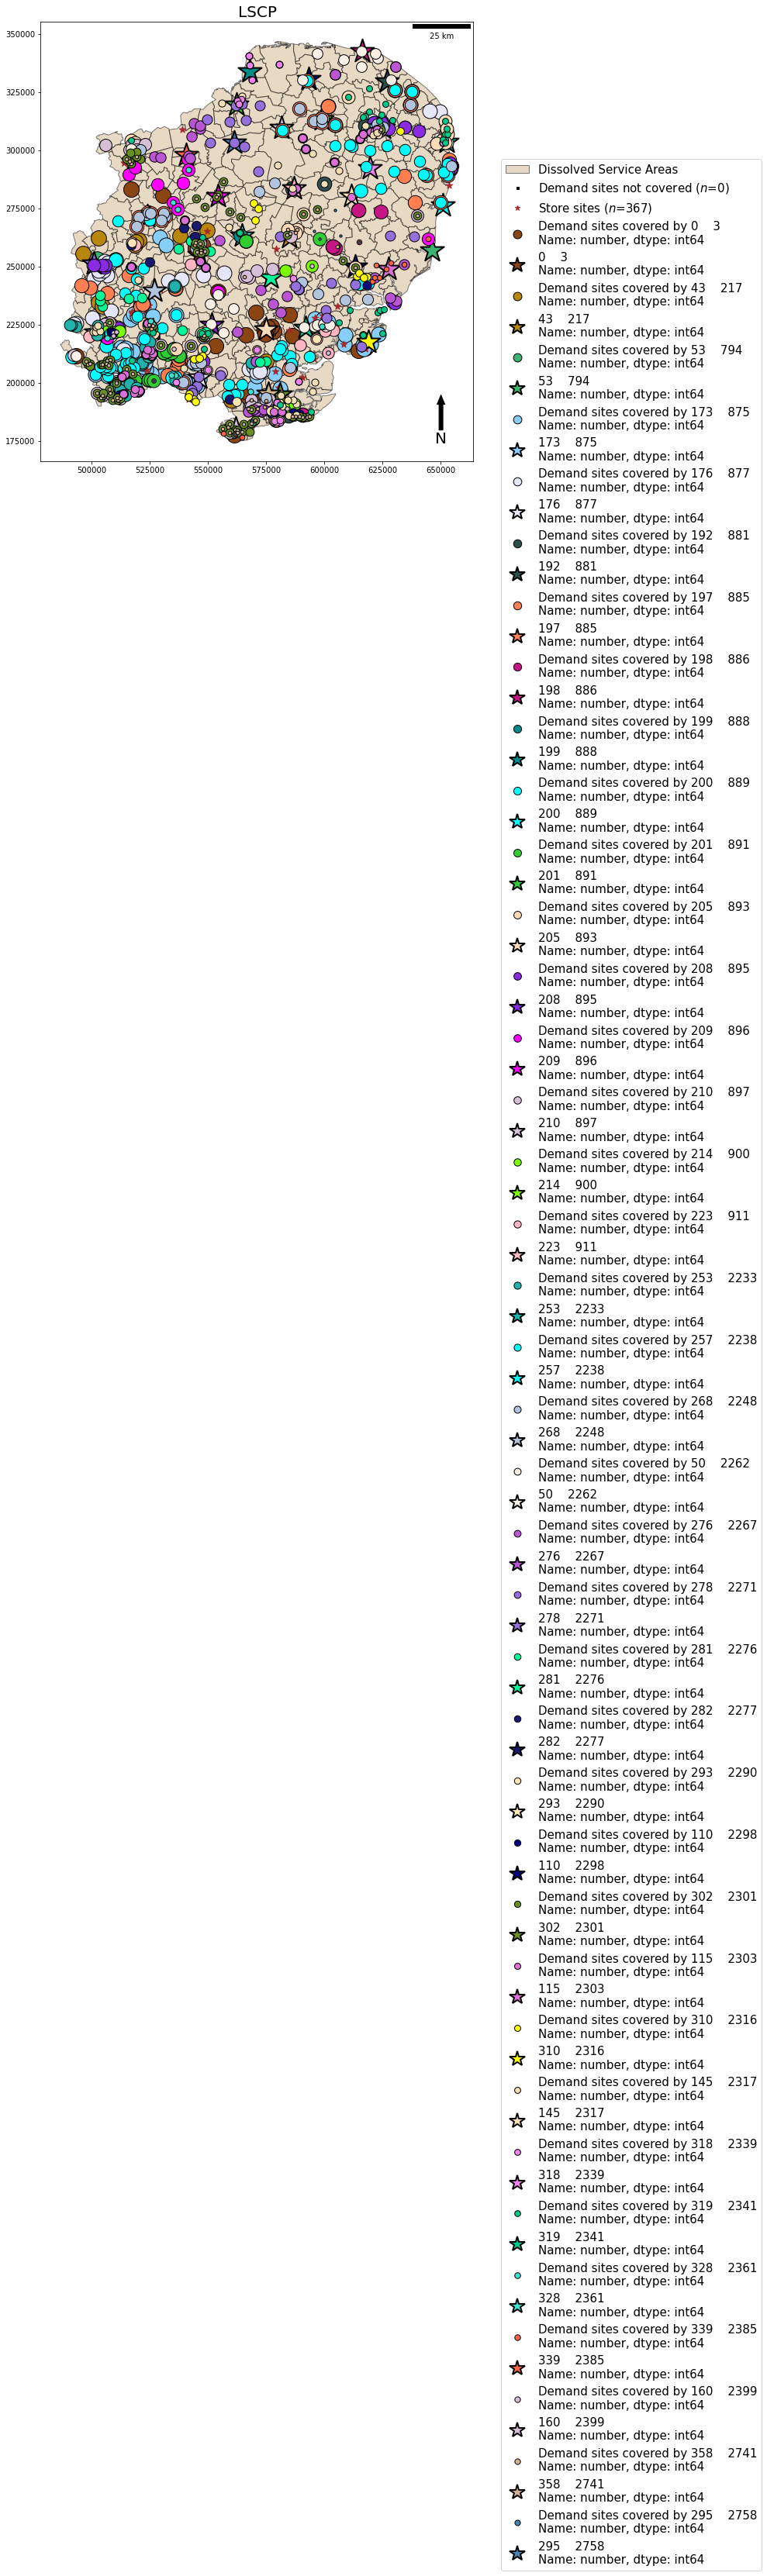

In [124]:
plot_results(lscp, centresEast, eastMSOAcentroids, centresEast.shape[0], "LSCP", lscp.problem.objective.value())